In [2]:
# Codigo de https://www.tensorflow.org/tutorials/keras/classification

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


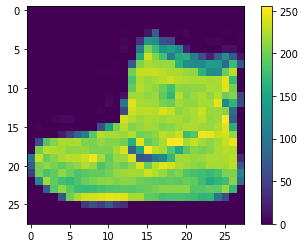

9
Datos de entrenamiento:  (60000, 28, 28)
Datos de test:  (10000, 28, 28)


In [3]:
# Comprovamos como son los datos (imagen, label)
plt.figure()                  # Inicializamos la figura
plt.imshow(train_images[0])   # indicamos la primera imagen
plt.colorbar()                # Mostramos el indice de color
plt.show()                    # Mostramos el grafico

# Podemos comprobar que los colores van de 0 a 255

print(train_labels[0])

# Comprovamos el shape de los datos de entrada (imagenes)
# Podemos observar que son 60000 imagenes de 28px x 28px
print('Datos de entrenamiento: ' , train_images.shape)
print('Datos de test: ', test_images.shape)
'''
Las clases estan compuestas por estos elementos:

0 	T-shirt/top
1 	Trouser
2 	Pullover
3 	Dress
4 	Coat
5 	Sandal
6 	Shirt
7 	Sneaker
8 	Bag
9 	Ankle boot

'''

# Creamos un array con los nombres que queremos assignar a cada clase

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



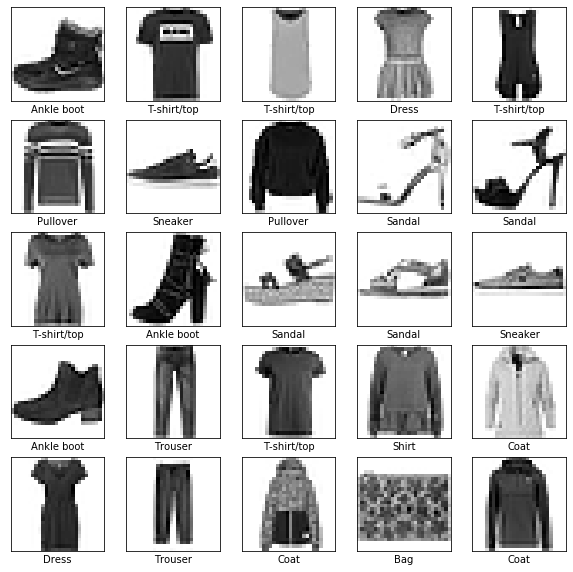

In [4]:
# Una cosa habitual para las redes neuronales es escalar los colores en rangos de 0 a 1 (En formato float32)
# Las operaciones aritmeticas en coma foltante son mas eficientes en los ordenadors ese el el motivo del cambio

train_images = train_images / 255.0
test_images = test_images / 255.0

# Ahora comprovamos los cambios sobre las imagenes iterando sobre 
plt.figure(figsize=(10,10))                               # Inicializamos la figura con el tamaño de 10 x 10 (Para visualizar)
for i in range(25):
    plt.subplot(5,5,i+1)                                  # Metodo para crear diferentes graficas (En este caso decimos que es 5 x 5 y el valor de i es la posicion es esa matriz)
    plt.xticks([])                                        # Valores de referencia en el eje x = None
    plt.yticks([])                                        # Valores de referencia en el eje y = None
    plt.grid(False)                                       
    plt.imshow(train_images[i], cmap=plt.cm.binary)       # Mostramos la imagen en binario
    plt.xlabel(class_names[train_labels[i]])              # Valor de la label
plt.show()


In [5]:
# Ceramos el modelo, sera de manera Sequencial

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),   # Capa encargada de pasar una matriz (2D) a un vector (1D)
                          keras.layers.Dense(128, activation='relu'),   # Capa encargada de aprender los rasgos de cada ropa (La que aprende de verdad)
                          keras.layers.Dense(10, activation='softmax')  # Capa encargada de devolver un valor dependiendo de que clase es (Por eso el tipo de activacion = softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# Compilamos el modelo descrito anteriormente

model.compile(optimizer='adam',                         # Optimizador --> Encargado de modificar los parametros de cada neurona (Sesgos)
              loss='sparse_categorical_crossentropy',   # Loss        --> Forma de calcular el loss de cada epoca
              metrics=['accuracy'])                     # Metrics     --> Valores a mostrar en cada epoca (formas de volorar un modelo en la fase de entrenamiento)

In [7]:
# Entrenamos el modelo

model.fit(train_images, train_labels, epochs=10)        # Pasamos por parametro las imagenes y las etiquedas y el numero de epocas

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4954 - acc: 0.8249
Epoch 2/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3730 - acc: 0.8644
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3345 - acc: 0.8773
Epoch 4/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3126 - acc: 0.8857
Epoch 5/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2915 - acc: 0.8928
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2779 - acc: 0.8983
Epoch 7/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2669 - acc: 0.9011
Epoch 8/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2542 - acc: 0.9052
Epoch 9/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.2460 - acc: 0.9080
Epoch 10/10
60000/60000 [==============================] - 

In [8]:
# Evaluamos el modelo

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3546 - acc: 0.8811

Test accuracy: 0.8811


Prediccion: Sneaker -- Valor real: Sneaker


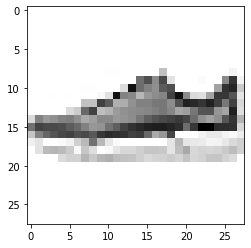

In [17]:
# Ahora podemos realizar predicciones con el modelo creado

posicion_imagen = 9

predictions = model.predict(test_images)
print("Prediccion:", class_names[np.argmax(predictions[posicion_imagen])], "-- Valor real:", class_names[test_labels[posicion_imagen]])
plt.figure()
plt.imshow(test_images[posicion_imagen], cmap=plt.cm.binary)

In [0]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.
